In [105]:
import os
import random

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import pandas as pd

## Get Data Streams

In [106]:
DATE = "20221213"
DATA_ROOT = f"/Users/mauricio/Documents/development/projects/tides_logs/{DATE}/"

file_list = os.listdir(DATA_ROOT)
file_list.sort()
file_groups = {}

for file in file_list:
    file_group = file.split("_")[0]
    if file_group not in file_groups:
        file_groups[file_group] = []
    file_groups[file_group].append(file)

sensor_data = {}

for file_group in file_groups:
    files = file_groups[file_group]
    for file in files:
        f = open(os.path.join(DATA_ROOT, file),"r")
        lines = list(filter(lambda x: "Voltage" in x, f.readlines()))
        if file_group not in sensor_data:
            sensor_data[file_group] = []
        sensor_data[file_group].extend(lines)
        

charger_data = {}

for file_group in file_groups:
    files = file_groups[file_group]
    for file in files:
        f = open(os.path.join(DATA_ROOT, file),"r")
        lines = list(filter(lambda x: " charger " in x and " charger = " not in x, f.readlines()))
        if file_group not in charger_data:
            charger_data[file_group] = []
        charger_data[file_group].extend(lines)
        

In [128]:
sensor_obs = list(map(lambda x: (x.replace("\n", "").split(" Voltage: ")[0], x.replace("\n", "").split(" Voltage: ")[1]), sensor_data["tides"]))
charger_obs = list(map(lambda x: (x.replace("\n", "").split(" charger ")[0], x.replace("off\n", "0").replace("on\n", "1").split(" charger ")[1]), charger_data["tides"]))


In [129]:
dfv = pd.DataFrame(sensor_obs, columns=["date", "voltage"])
dfv["date"] = dfv["date"].apply(pd.to_datetime)
dfv["voltage"] = dfv["voltage"].apply(float)
dfv = dfv.sort_values("date").reset_index(drop=True)
dfv.to_csv(f"~/Documents/development/projects/tides_logs/{DATE}/voltage.csv")

In [130]:
dfc = pd.DataFrame(charger_obs, columns=["date", "charger"])
dfc["date"] = dfc["date"].apply(pd.to_datetime)
dfc["charger"] = dfc["charger"].apply(float) + 25
dfc = dfc.sort_values("date").reset_index(drop=True)
dfc.to_csv(f"~/Documents/development/projects/tides_logs/{DATE}/charger.csv")

In [131]:
merged = pd.merge_ordered(dfc, dfv, fill_method="ffill")

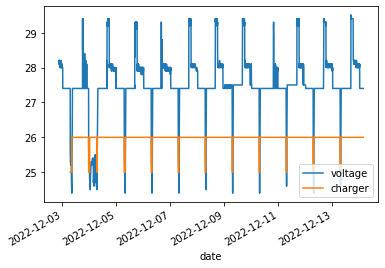

In [132]:
ax = merged.plot(x="date", y=["voltage", "charger"])
#dfc.plot(ax=ax, x="date", y="charger")

plt.show()


In [118]:
merged

,date,charger,voltage
0,2022-12-02 20:57:36.350,NaN,28.2
1,2022-12-02 20:58:38.458,NaN,28.1
2,2022-12-02 20:59:40.551,NaN,28.2
3,2022-12-02 21:00:42.652,NaN,28.2
4,2022-12-02 21:01:44.736,NaN,28.2
...,...,...,...
6079,2022-12-14 03:22:04.394,NaN,27.4
6080,2022-12-14 03:25:10.680,NaN,27.4
6081,2022-12-14 03:28:16.954,NaN,27.4
6082,2022-12-14 03:31:23.264,NaN,27.4


## Generate Sample Position Data

In [13]:
initial = 0.0
sample = []
for i in range(sensor_data["positions"]["lat"].shape[0]):
    sample.append(initial)
    initial = initial + random.randrange(-1.0, 1.0)
sensor_data["positions"]["lat"] = sensor_data["positions"]["lat"] + sample
initial = 0.0
sample = []
for i in range(sensor_data["positions"]["lat"].shape[0]):
    sample.append(initial)
    initial = initial + random.randrange(-1.0, 1.0)
sensor_data["positions"]["lon"] = sensor_data["positions"]["lon"] + sample

KeyError: 'positions'

## Plot Results

In [27]:
def display_sensor_data(start, end):
    #for group in sensor_data:
    #    data_subset = sensor_data[group]
    #    data_subset = data_subset[(data_subset.index >= start) & (data_subset.index <= end)]
    #    if group == "positions":
    #        plt.plot(data_subset["lon"], data_subset["lat"])
    #    else:
    #        plt.plot(data_subset[data_subset.columns])
    #    plt.title(group)
    #    plt.xticks(rotation=45)
    #    plt.show()
    data_subset = sensor_data["pressure"]
    data_subset = data_subset[(data_subset.index >= start) & (data_subset.index <= end)]
    if group == "positions":
        plt.plot(data_subset["lon"], data_subset["lat"])
    else:
        plt.plot(data_subset[data_subset.columns])
    plt.title(group)
    plt.xticks(rotation=45)
    plt.show()


@interact
def slice_sensor_data(start=sensor_data["pressure"].index, end=sensor_data["pressure"].index):
    display_sensor_data(start, end)



KeyboardInterrupt: 

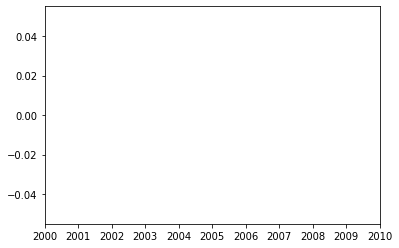

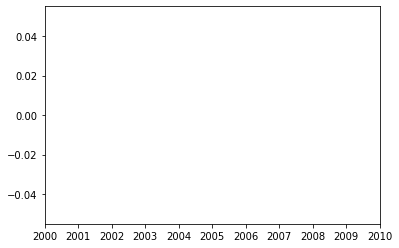

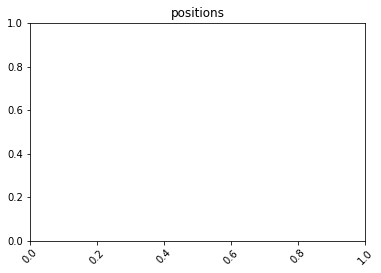

In [22]:
group = "positions"
data_subset = sensor_data[group]
#data_subset = data_subset[(data_subset.index >= pd.Timestamp('2022-08-23T0520')) & (data_subset.index <= pd.Timestamp('2022-08-23T0930'))]
#data_subset = data_subset[(data_subset.index >= pd.Timestamp('2022-08-24T0520'))]
data_subset = data_subset[(data_subset["lat"] < 40.81) & (data_subset["lon"] > 40.0)]
if group == "positions":
    #plt.scatter(data_subset["lon"], data_subset["lat"])
    plt.plot(data_subset["lat"])
    plt.show()
    plt.plot(data_subset["lon"])
    plt.show()
else:
    plt.plot(data_subset[data_subset.columns])
plt.title(group)
plt.xticks(rotation=45)
plt.show()


In [14]:
sensor_data["positions"].sort_index()

,lat,lon,alt
timestamp,,,
2022-08-17 03:09:29.067942,37.850341,-122.253912,76.997
2022-08-17 03:15:50.304166,37.850351,-122.253888,66.996
2022-08-17 03:54:22.330026,37.850361,-122.253845,56.929
2022-08-17 03:54:56.322874,37.850371,-122.253860,46.463
2022-08-17 03:55:46.319916,37.850381,-122.253848,56.537
...,...,...,...
2022-08-24 19:21:39.814534,40.785245,-119.217555,1177.708
2022-08-24 19:22:14.820007,40.785255,-119.217564,1187.726
2022-08-24 19:24:45.835646,40.785265,-119.217555,1197.770
